## Bay Wheels Bike Sharing Programm 

## Investigation Overview
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.This dataset is from the 12-month ride trips in 2019.

## Dataset Overview
In this project I will be analizing Bay Wheels's trip public data from 2019 year. Bike share - is  `an affordable, accessible, and fun new transportation option` ([source](https://www.lyft.com/bikes/bay-wheels)) for all residents of the Bay Area offered by Lyft.

Each trip is anonymized and includes:

 - Trip Duration (seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
 - bike_share_for_all_trip
 - rental access method (mobile app or clipper (transit card))
 
 Data is divided by month,so we need some data wrangling to unite all pieces into one entire dataset. 

So, let's start off by importing packages and performing some transformations

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from tqdm import tqdm
sns.set()
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
os.chdir('archives')

In [21]:
# Creating mask to filter only .zip files
list_of_files = np.array(os.listdir())
mask = [x.endswith('zip') for x in list_of_files]
only_zip = list_of_files[mask]

In [22]:
only_zip

array(['201901-fordgobike-tripdata.csv.zip',
       '201902-fordgobike-tripdata.csv.zip',
       '201903-fordgobike-tripdata.csv.zip',
       '201904-fordgobike-tripdata.csv.zip',
       '201905-baywheels-tripdata.csv.zip',
       '201906-baywheels-tripdata.csv.zip',
       '201907-baywheels-tripdata.csv.zip',
       '201908-baywheels-tripdata.csv.zip',
       '201909-baywheels-tripdata.csv.zip',
       '201910-baywheels-tripdata.csv.zip',
       '201911-baywheels-tripdata.csv.zip',
       '201912-baywheels-tripdata.csv.zip'], dtype='<U34')

In [23]:
def union_all(list_of_zips) -> pd.DataFrame:
    """
    Small function to concatenate .csv files
    
    Parameters:
    ----------
    list_of_zips : numpy array object
        numpy array  with .zip files
    """
    
    lst_df = []
    print(f'There are {list_of_zips.shape[0]} elements in the array')
    print('Iterating over array...')
    for name in tqdm(list_of_zips):
        zip_name = name
        file_name = zip_name[:-4]
        with zipfile.ZipFile(zip_name) as file:
            with file.open(file_name) as data:
                df = pd.read_csv(data)
                lst_df.append(df)
    result = pd.concat(lst_df)
    return result

In [27]:
df = union_all(only_zip)

There are 12 elements in the array
Iterating over array...


100%|██████████████████████████████████████████| 12/12 [00:22<00:00,  1.85s/it]


In [4]:
df[['start_station_name']] = df[['start_station_name']].replace(np.nan, 'no name for this station', regex=True)
df[['end_station_name']] = df[['end_station_name']].replace(np.nan, 'no name for this station', regex=True)
df['start_time'] = pd.to_datetime(df['start_time'],yearfirst = True)
df['end_time'] = pd.to_datetime(df['end_time'],yearfirst = True)
df['duration_min'] = df['duration_sec']/60
df['start_day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()

### Duration of a trip : Customer VS Subscriber

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_day,month
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347.083333,Thursday,January
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098.333333,Thursday,January
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043.883333,Thursday,January
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744.666667,Thursday,January
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011.816667,Thursday,January


During data analisys in the previous part, we discovered that subscribers are the majority in our data, and it would seem that subscribers have longer trips and in general are more active, but that is not almost true:

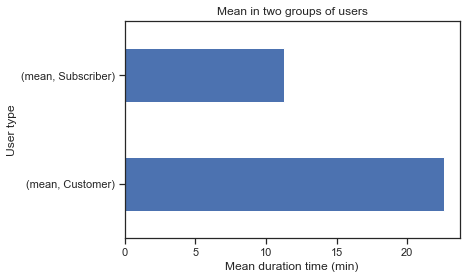

In [6]:
plt.title('Mean in two groups of users')
ax = df.groupby('user_type')['duration_min'].agg([np.mean]).unstack().plot(kind = 'barh')
ax.set(title='Mean in two groups of users', 
       xlabel = 'Mean duration time (min)',ylabel='User type');

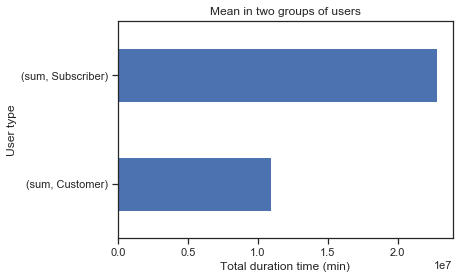

In [7]:
plt.title('Total duration in two groups of users')
ax = df.groupby('user_type')['duration_min'].agg([np.sum]).unstack().plot(kind = 'barh')
ax.set(title='Mean in two groups of users', 
       xlabel = 'Total duration time (min)',ylabel='User type');

Total duration sum in Subscriber group is as much as twice higher than in Customer group, but mean time is twice higher in Customer group, despite the fact that I removed outlier from Customer user type and nothing changed, just a few decimals.

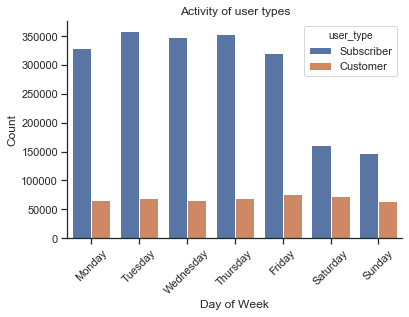

In [8]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='start_day', hue='user_type', order = order)
plt.title('Activity of user types')
plt.xlabel('Day of Week');
plt.ylabel('Count')
plt.xticks(rotation = 45)
sns.despine();

Look at the plot above. During weekend there is a drop in number of occurences in both groups,right? Now, look at the plot below.

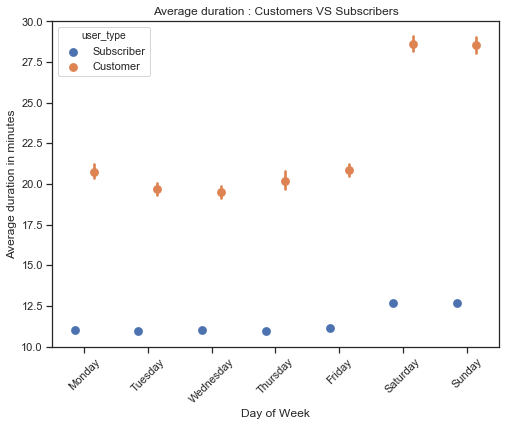

In [9]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8,6))
sns.pointplot(data=df, x='start_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="",order=order)
plt.title('Average duration : Customers VS Subscribers')
plt.xlabel('Day of Week')
plt.ylabel('Average duration in minutes')
plt.xticks(rotation=45);

In the mean time, our mean time increases during weekend in both groups, especially in Customers, people use bikes for longer time, because they have more time comparing to work days.

Activity by month. Again, there are a lot more subsribers,starting from June customers count increases, then minir pit in November, and maximal values in December.

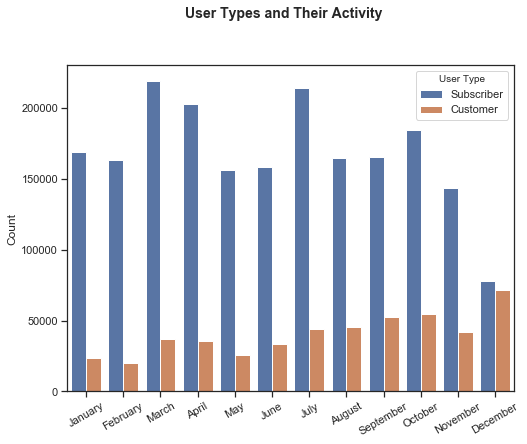

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='month', hue='user_type');
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Activity', fontsize=14, fontweight='semibold', y=1.015);

And again, mean dration time is higher for Customers during the whole year

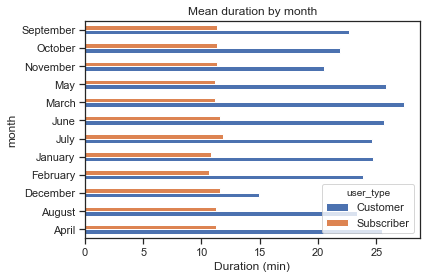

In [16]:
ax = df.groupby(['month','user_type'])['duration_min'].agg(np.mean).unstack().plot(kind = 'barh')
ax.set(title='Mean duration by month',xlabel = 'Duration (min)');


### Summary
In the dataset represented number of user types varies in favour of Subscribers, people in this group bikes all year round, probably they have annual subscription, that is they use bikes every day, and according to visuals, to get ot their job, mostly from ordinary stations to train stations and vice verse when going back home. Travel for a short distances day to day for the whole year with  slightly prolonged duration on weekdays - that is a behavoir of subscribers.

Whereas Customers are different. They use bikes to get around, explore the area, lot's of turists among them,I suppose. The interseting fact is that people in this group tend to rent a bike (on average) for a longer time during the whole year, despite the fact their number is twice as much as lower then in Subscribers group.

